# Base Climada Tutorial using CLimadaBR class

This tutorial shows a little about the workings of the Climada tool. Here we are using ClimadaBR class to show its main functions but it could be done directly with Climada class, although with different methods. If you wish to know more about Climada you can checkout its official tutorials, for example [Climada Main Tutorial](https://github.com/Labic-ICMC-USP/CLIMADA-BR/blob/main/doc/tutorial/1_main_climada.ipynb).

**Before this you should read our README.md in the doc/ClimadaBR_docs/ directory, copies of our source files are there too so take and put them in the climada SYSTEM_DIR, so that the code works (the README.md also has an explanation of how to do it).**

The files needed are:
- gpw-v4-population-count-rev11_2020_30_sec_tif foulder
- dengue_hazzards_news.xlsx
- DengueFunc.xlsx

# Step 1. Defining Exposures

The ClimadaBR can setup everything by creating the object, in this case I will create it with None values to show it step by step,
starting with the Exposure.

The exposure is automatically setup in the object creation unless you pass an Exposure object.

Exposure describes the set of assets, people, livelihoods, infrastructures, etc. within an area of interest in terms of their geographic location, their value etc.; in brief - everything potentially exposed to hazards.

Using LitPop Exposures:
https://climada-python.readthedocs.io/en/stable/tutorial/climada_entity_LitPop.html

In [1]:
import warnings
warnings.filterwarnings('ignore') # Makes the results cleaner

%matplotlib inline
from climada.climadaBR import *

# For this cell to work we need the gpw-v4-population-count-rev11_2020_30_sec_tif foulder.
# You can find out more about it in the LitPop tutorial. After downloading, you need to copy it to the system
# directory.
climadabr = ClimadaBR(None, None)

Defining Exposure
2025-02-07 21:45:04,513 - climada.entity.exposures.litpop.litpop - INFO - 
 LitPop: Init Exposure for country: BRA (76)...

2025-02-07 21:45:12,097 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-02-07 21:45:12,098 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2025-02-07 21:45:12,170 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-02-07 21:45:12,171 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2025-02-07 21:45:12,293 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-02-07 21:45:12,293 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2025-02-07 21:45:12,319 - climada.entity.exposures.litpop.gpw_population - WARNING - Referenc

2025-02-07 21:46:58,412 - climada.util.coordinates - INFO - Raster from resolution 0.08333332999999854 to 0.08333332999999854.


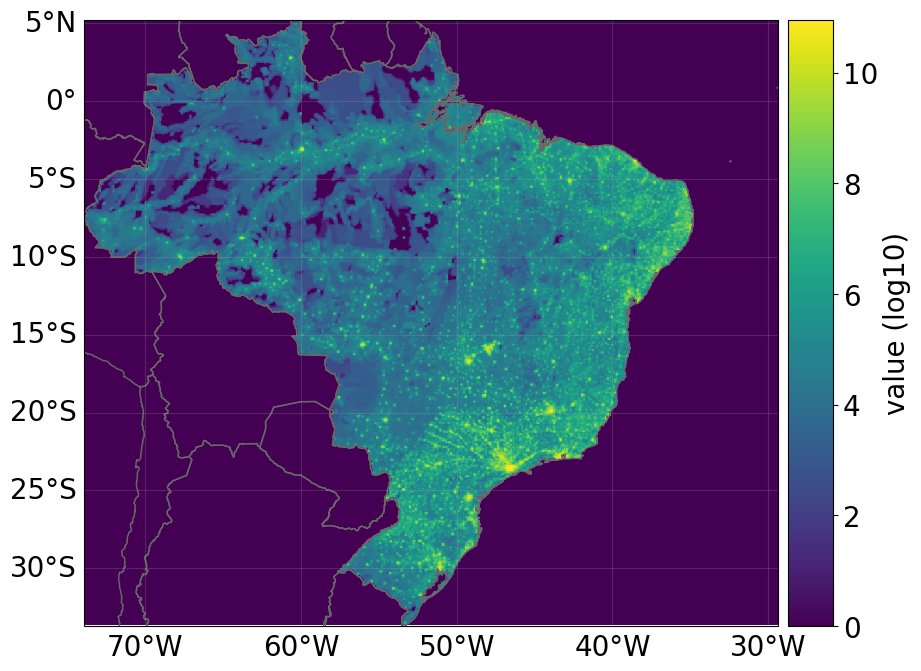

In [9]:
climadabr.Plot_Exposure()

# Step 2. Defining Hazards

A hazard describes climate-related events such as storms, floods, droughts, or heat waves both in terms of probability of occurrence as well as physical intensity.

**IMPORTANT:** In our project, we will extend the hazards to include events generated by climate change, such as the growth of diseases, mosquito-borne vectors, impacts on crops, pollution, effects on the healthcare system, and any other range of events that we can model from news articles extracted from the portals of the country in question.


In [2]:
climadabr.Set_Hazard('dengue_hazzards_news.xlsx')

Defining Hazard
Creating Hazard Dataframe: |██████████████████████████████████████████████████| 100.0% Complete
Creating Hazard Object: |██████████████████████████████████████████████████| 100.0% Complete


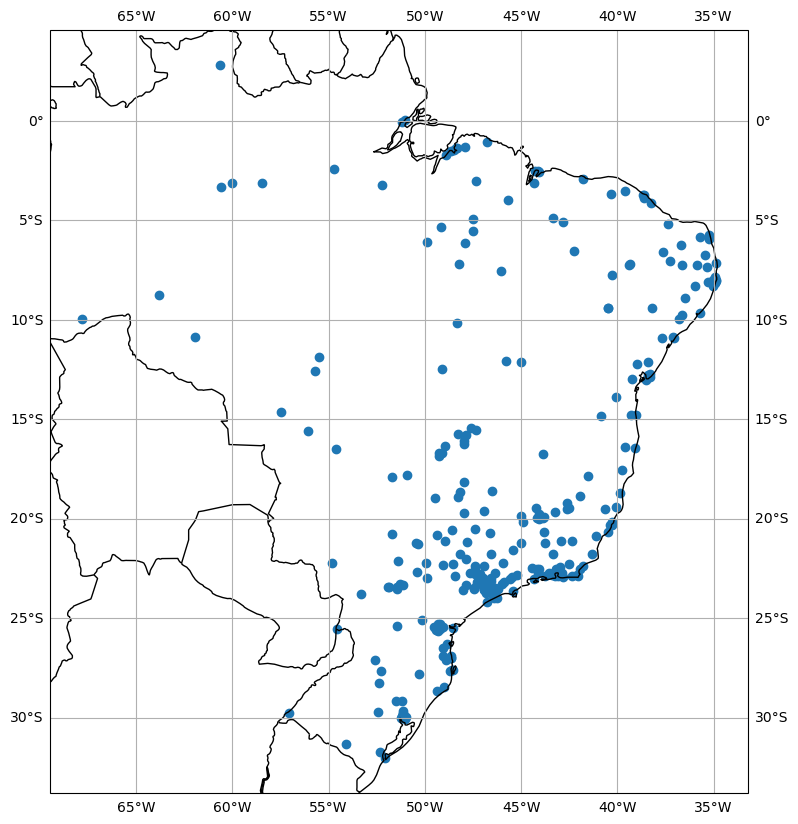

In [10]:
climadabr.Plot_Haz_Centroids()

# Step 3. Defining Impact Functions

An impact function relates the percentage of damage in the exposure to the hazard intensity, also commonly referred to as a “vulnerability curve” in the modelling community. Every hazard and exposure types are characterized by an impact function.


In [ ]:
climadabr.Set_ImpFun("DengueFunc2.xlsx")

Defining Impact Function Set
Progress: |██████████████████████████████████████████████████| 100.0% Complete


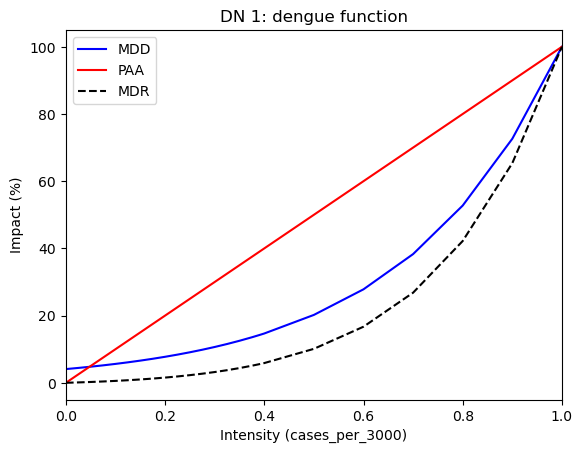

In [11]:
climadabr.Plot_ImpFun()

# Step 4. Computing Impact

The impact is the combined effect of hazard events on a set of exposures mediated by a set of impact functions. By computing the impact for each event (historical and synthetic) and for each exposure value at each geographical location, the Impact provides different risk measures, such as the expected annual impact per exposure, the probable maximum impact for different return periods, and the total average annual impact.

In [7]:
climadabr.ComputeImpact()

Computing Impact
2025-02-07 21:46:28,751 - climada.entity.exposures.base - INFO - Exposures matching centroids already found for DN
2025-02-07 21:46:28,752 - climada.entity.exposures.base - INFO - Existing centroids will be overwritten for DN
2025-02-07 21:46:28,753 - climada.entity.exposures.base - INFO - Matching 101818 exposures with 303 centroids.
2025-02-07 21:46:28,755 - climada.util.coordinates - INFO - No exact centroid match found. Reprojecting coordinates to nearest neighbor closer than the threshold = 100
2025-02-07 21:46:28,850 - climada.util.coordinates - WARNING - Distance to closest centroid is greater than 100km for 68862 coordinates.
2025-02-07 21:46:28,855 - climada.engine.impact_calc - INFO - Calculating impact for 98820 assets (>0) and 2065 events.


2025-02-07 21:46:30,967 - climada.util.coordinates - INFO - Setting geometry points.
2025-02-07 21:46:30,993 - climada.util.coordinates - INFO - Raster from resolution 0.08333332999999854 to 0.08333332999999854.
The impact of 2065 groups of events were analised across 303 different locations.
The events were grouped by month and location.
The results calculated by climada are the following:
Aggregated average annual impact calculated: 1038242155.0 $


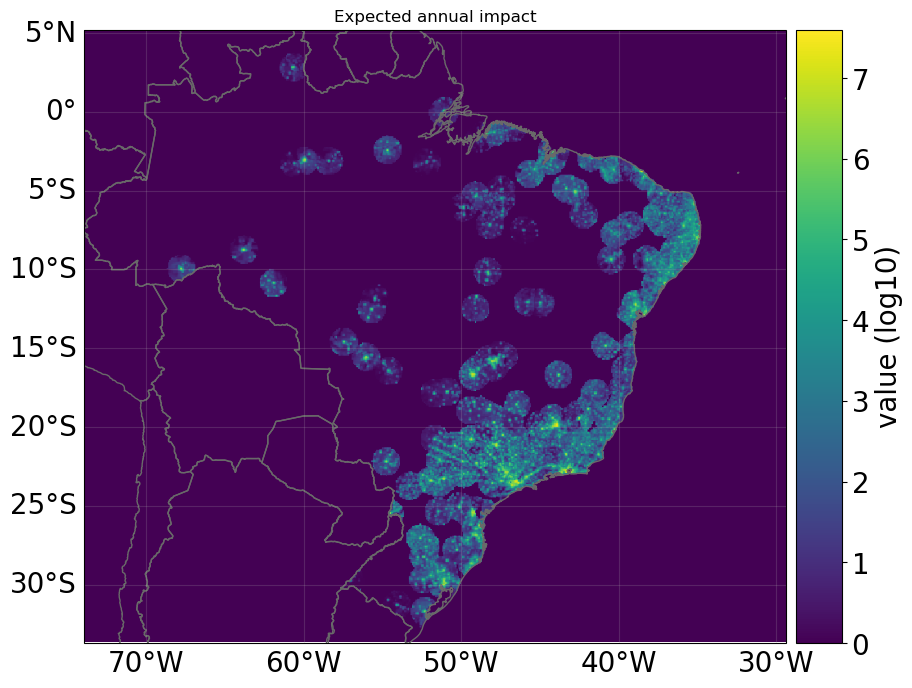

In [8]:
climadabr.Results()